In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('all stats premier league 22-23.csv')

In [4]:
data.head()

,Unnamed: 0,Player,Nation,Pos,Age,MP,Starts,Min,90s,Gls,...,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Matches_y
0,0,Aaron Ramsdale,ENG,GK,24.0,38,38,3420.0,38.0,0.0,...,100.0,0,0,0,0,0,1,20,6,Matches
1,1,Gabriel Dos Santos,BRA,DF,24.0,38,38,3409.0,37.9,3.0,...,66.7,9,49,26,23,32,80,125,2,Matches
2,2,Bukayo Saka,ENG,FW,20.0,38,37,3181.0,35.3,14.0,...,45.5,24,38,0,38,14,77,19,0,Matches
3,3,Martin Ødegaard,NOR,MF,23.0,37,37,3127.0,34.7,15.0,...,29.8,33,20,5,15,6,42,12,1,Matches
4,4,Ben White,ENG,DF,24.0,38,36,3055.0,33.9,2.0,...,60.0,28,47,11,36,22,82,79,1,Matches


In [5]:
data.columns

Index(['Unnamed: 0', 'Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min',
       '90s', 'Gls', 'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG',
       'npxG', 'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Matches_x', 'Club',
       'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd', 'Tkl.1', 'Att', 'Tkl%',
       'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int', 'Clr', 'Err',
       'Matches_y'],
      dtype='object')

In [6]:
data.shape

(504, 43)

### Dropping GK position, Match Played less than 10, and Minutes Played less than 100 min

In [7]:
drop = data[(data['Pos'] == 'GK') | (data['MP'] < 10) | (data['Min'] < 100)].index
data.drop(drop, inplace=True)

In [8]:
data.shape

(404, 43)

In [9]:
data['Club'] = [l.replace('Stats', '').replace('-', ' ') for l in data['Club']]

### Selected Offensive Stats

In [10]:
offense = data[['Player','Club', 'Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP']]

In [11]:
offense['Club'].unique()

array(['Arsenal ', 'Aston Villa ', 'Bournemouth ', 'Brentford ',
       'Brighton and Hove Albion ', 'Chelsea ', 'Crystal Palace ',
       'Everton ', 'Fulham ', 'Leeds United ', 'Leicester City ',
       'Liverpool ', 'Manchester City ', 'Manchester United ',
       'Newcastle United ', 'Nottingham Forest ', 'Southampton ',
       'Tottenham Hotspur ', 'West Ham United ',
       'Wolverhampton Wanderers '], dtype=object)

In [12]:
offense.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Gls,404.0,2.542079,4.007525,0.0,0.0,1.0,3.0,36.0
Ast,404.0,1.769802,2.364749,0.0,0.0,1.0,2.0,16.0
xG,404.0,2.672525,3.508467,0.0,0.6,1.5,3.2,28.4
xAG,404.0,1.919059,2.250725,0.0,0.5,1.1,2.6,16.7
PrgC,404.0,31.190594,28.918999,0.0,10.0,22.0,41.0,179.0
PrgP,404.0,69.361386,55.812457,2.0,27.0,54.0,98.0,266.0


In [13]:
offense.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 1 to 498
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  404 non-null    object 
 1   Club    404 non-null    object 
 2   Gls     404 non-null    float64
 3   Ast     404 non-null    float64
 4   xG      404 non-null    float64
 5   xAG     404 non-null    float64
 6   PrgC    404 non-null    float64
 7   PrgP    404 non-null    float64
dtypes: float64(6), object(2)
memory usage: 28.4+ KB


#### Visualizing Offensive Stats

<Figure size 4000x3000 with 0 Axes>

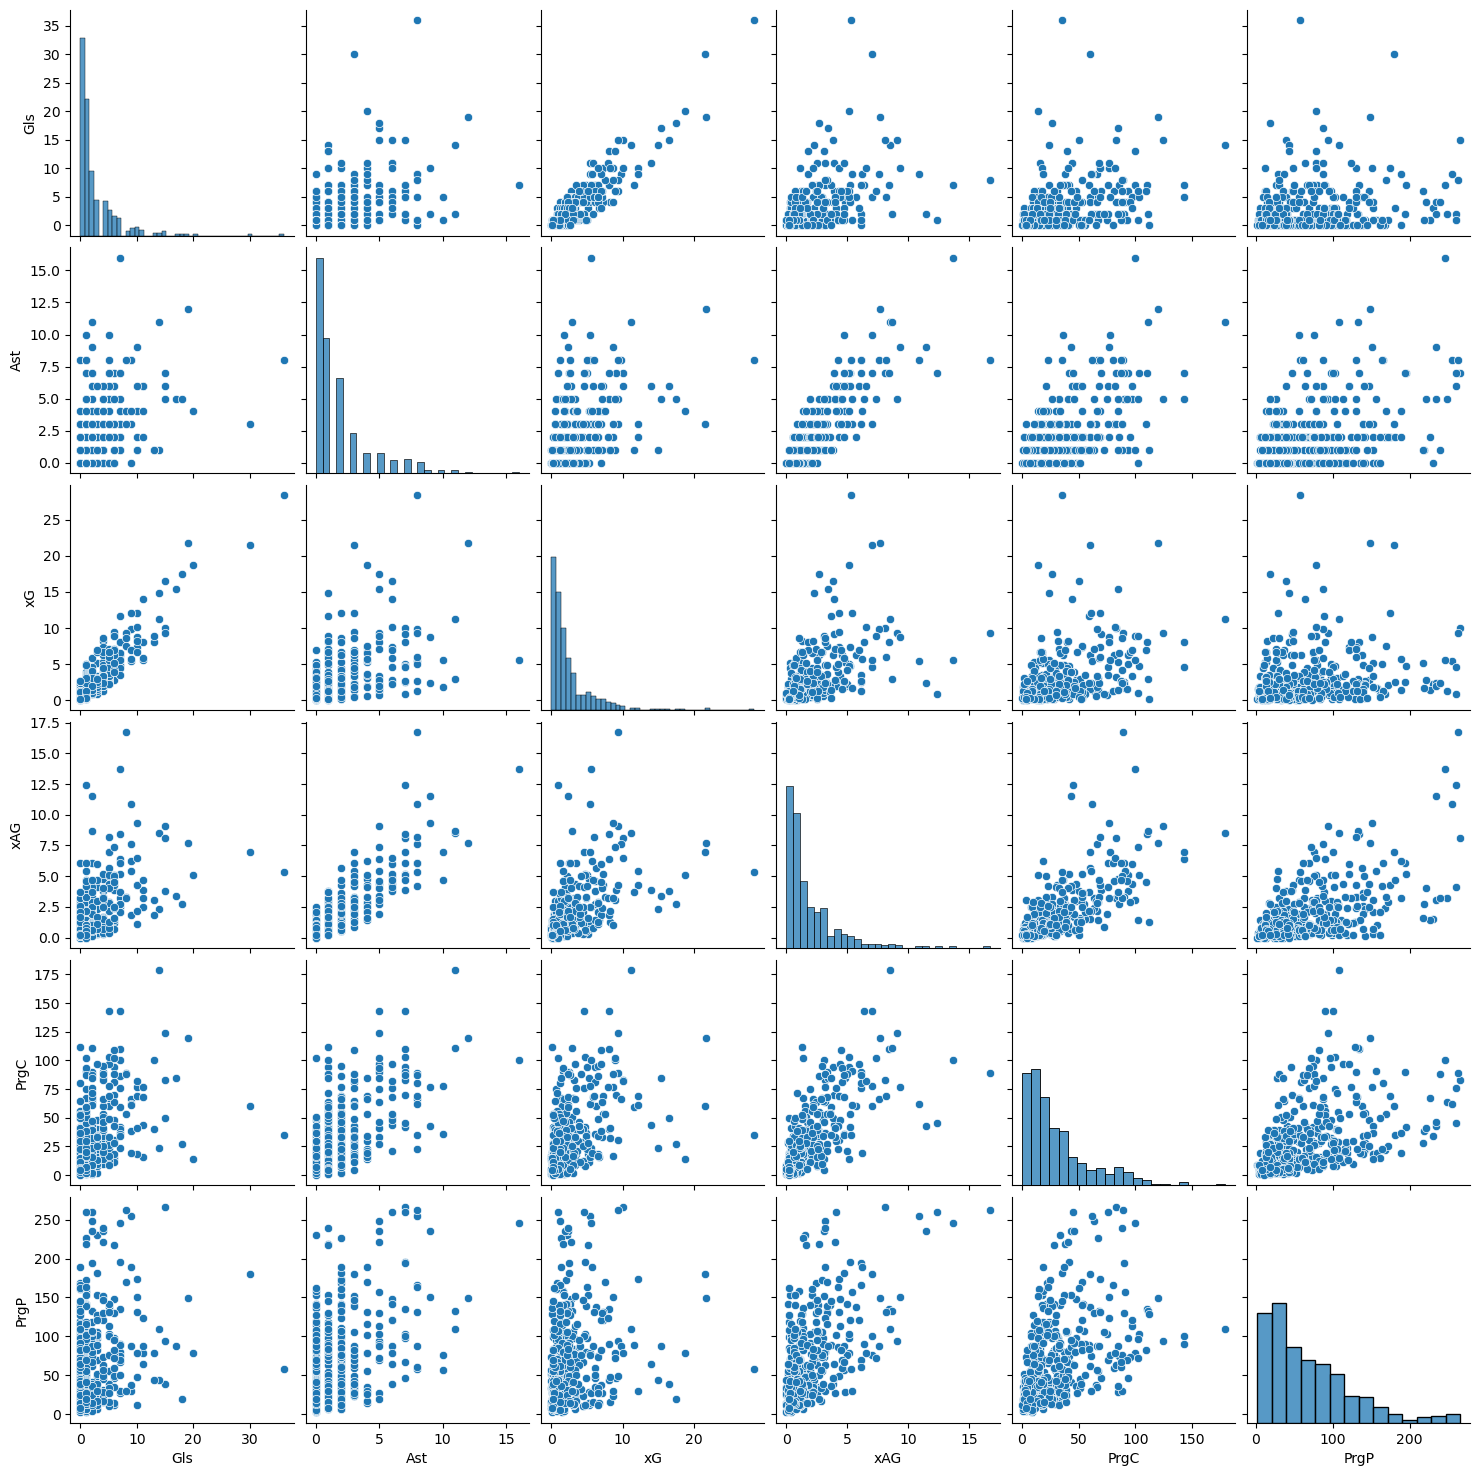

In [14]:
plt.figure(figsize=(40,30))
sns.pairplot(offense)

In [15]:
offense.columns

Index(['Player', 'Club', 'Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP'], dtype='object')

### Preprocessing data with Min Max Scaler

In [16]:
off_preprocessing = offense.copy()

In [17]:
scaler = MinMaxScaler()
off_preprocessing[['Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP']] = scaler.fit_transform(off_preprocessing[['Gls', 'Ast', 'xG', 'xAG', 'PrgC', 'PrgP']])

In [18]:
off_preprocessing.head()

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP
1,Gabriel Dos Santos,Arsenal,0.083333,0.0000,0.179577,0.017964,0.100559,0.571970
2,Bukayo Saka,Arsenal,0.388889,0.6875,0.394366,0.508982,1.000000,0.405303
3,Martin Ødegaard,Arsenal,0.416667,0.4375,0.352113,0.485030,0.463687,1.000000
4,Ben White,Arsenal,0.055556,0.3125,0.045775,0.191617,0.357542,0.935606
5,Granit Xhaka,Arsenal,0.194444,0.4375,0.165493,0.311377,0.234637,0.734848


## Clustering by Offensive Stats

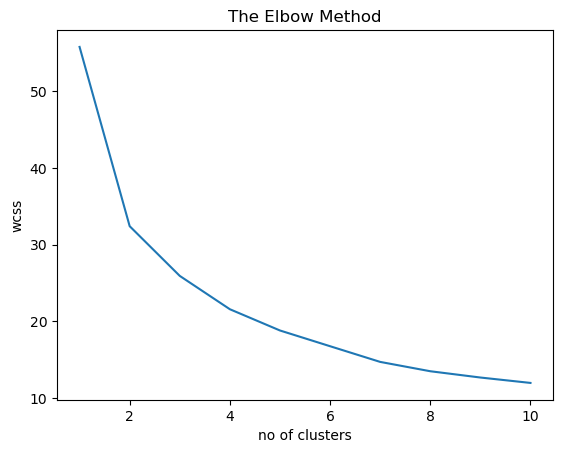

In [19]:
X_off = off_preprocessing[['PrgP','Gls', 'Ast', 'xG', 'xAG', 'PrgC']] #Clustering by Goals, assist, xg, xa, and progressive carries and passes
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X_off)
    wcss.append(kmeans.inertia_)     
plt.plot(range(1,11), wcss,)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

### From elbow method plot, best number of cluster is n=3

In [20]:
#Clustering data with K-Means Algorithm
model = KMeans(n_clusters=3 , init='k-means++', random_state=0)
y_kmeans= model.fit_predict(X_off)
labels = model.labels_
offense["Tier"] = labels
offense.head()

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Tier
1,Gabriel Dos Santos,Arsenal,3.0,0.0,5.1,0.3,18.0,153.0,1
2,Bukayo Saka,Arsenal,14.0,11.0,11.2,8.5,179.0,109.0,2
3,Martin Ødegaard,Arsenal,15.0,7.0,10.0,8.1,83.0,266.0,2
4,Ben White,Arsenal,2.0,5.0,1.3,3.2,64.0,249.0,1
5,Granit Xhaka,Arsenal,7.0,7.0,4.7,5.2,42.0,196.0,2


In [21]:
offense.loc[offense['Tier'] == 2, 'Category'] = 'A Tier'
offense.loc[offense['Tier'] == 1, 'Category'] = 'B Tier'
offense.loc[offense['Tier'] == 0, 'Category'] = 'C Tier'
offense.head()

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Tier,Category
1,Gabriel Dos Santos,Arsenal,3.0,0.0,5.1,0.3,18.0,153.0,1,B Tier
2,Bukayo Saka,Arsenal,14.0,11.0,11.2,8.5,179.0,109.0,2,A Tier
3,Martin Ødegaard,Arsenal,15.0,7.0,10.0,8.1,83.0,266.0,2,A Tier
4,Ben White,Arsenal,2.0,5.0,1.3,3.2,64.0,249.0,1,B Tier
5,Granit Xhaka,Arsenal,7.0,7.0,4.7,5.2,42.0,196.0,2,A Tier


In [22]:
offense = offense.drop('Tier', axis=1)

#### Visualizing K-Means Algorithm

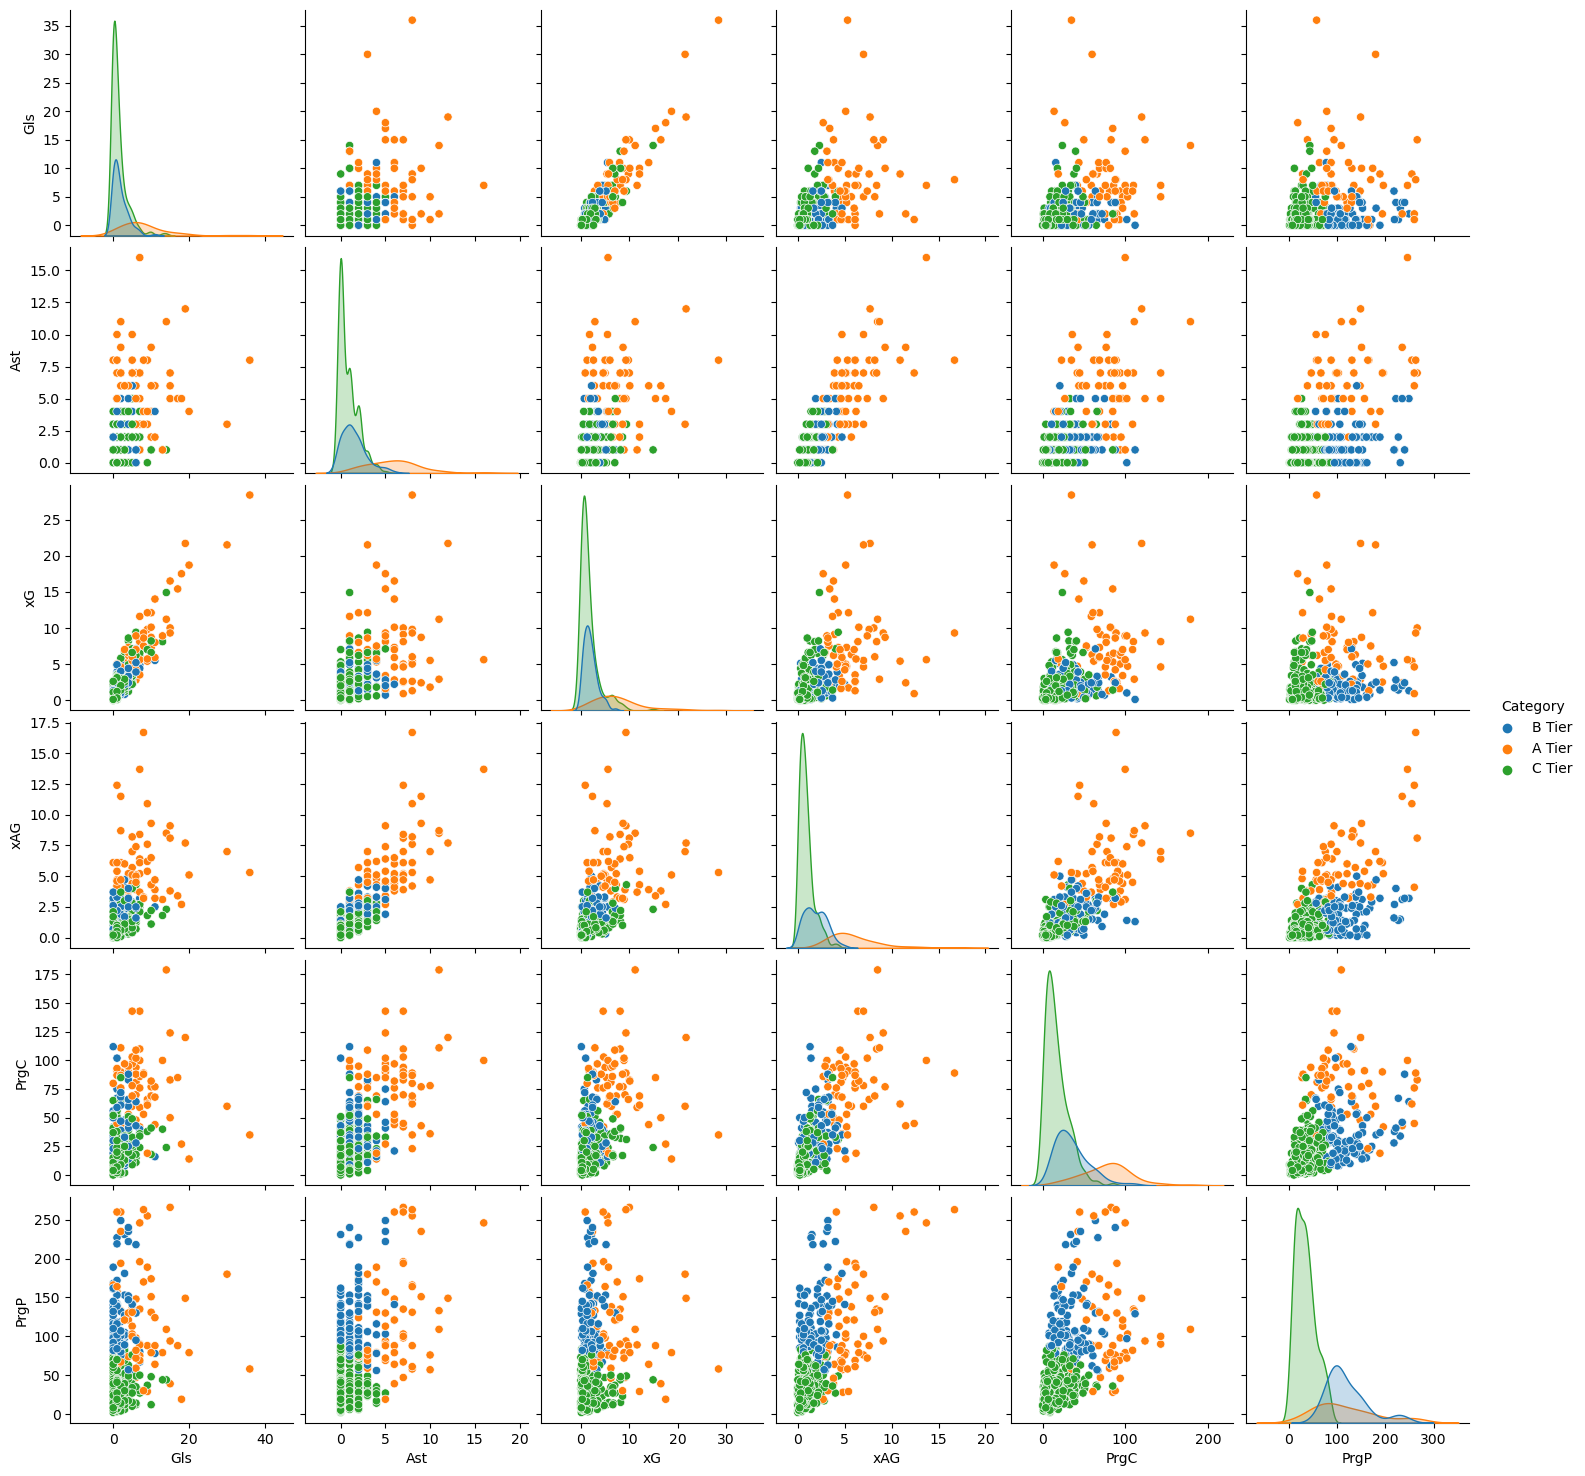

In [23]:
sns.pairplot(offense, hue='Category')

#### Data  A Tier players

In [24]:
data_a_tier = offense[offense['Category'] == 'A Tier']
data_a_tier

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Category
2,Bukayo Saka,Arsenal,14.0,11.0,11.2,8.5,179.0,109.0,A Tier
3,Martin Ødegaard,Arsenal,15.0,7.0,10.0,8.1,83.0,266.0,A Tier
5,Granit Xhaka,Arsenal,7.0,7.0,4.7,5.2,42.0,196.0,A Tier
6,Martinelli,Arsenal,15.0,5.0,9.3,9.1,124.0,94.0,A Tier
10,Gabriel Jesus,Arsenal,11.0,6.0,14.0,3.9,44.0,64.0,A Tier
...,...,...,...,...,...,...,...,...,...
431,Son Heung-min,Tottenham Hotspur,10.0,6.0,10.1,6.5,82.0,79.0,A Tier
437,Ivan Perišić,Tottenham Hotspur,1.0,8.0,2.6,6.1,87.0,61.0,A Tier
438,Dejan Kulusevski,Tottenham Hotspur,2.0,7.0,2.6,4.7,87.0,67.0,A Tier
454,Jarrod Bowen,West Ham United,6.0,5.0,8.9,7.4,102.0,72.0,A Tier


#### Data B Tier players

In [25]:
data_b_tier = offense[offense['Category'] == 'B Tier']
data_b_tier

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Category
1,Gabriel Dos Santos,Arsenal,3.0,0.0,5.1,0.3,18.0,153.0,B Tier
4,Ben White,Arsenal,2.0,5.0,1.3,3.2,64.0,249.0,B Tier
7,Thomas Partey,Arsenal,3.0,0.0,2.2,1.5,34.0,231.0,B Tier
8,William Saliba,Arsenal,2.0,1.0,0.9,1.2,13.0,99.0,B Tier
9,Oleksandr Zinchenko,Arsenal,1.0,2.0,1.4,1.4,67.0,227.0,B Tier
...,...,...,...,...,...,...,...,...,...
477,Rúben Neves,Wolverhampton Wanderers,6.0,1.0,5.2,1.6,28.0,218.0,B Tier
478,Nélson Semedo,Wolverhampton Wanderers,0.0,1.0,0.4,0.7,50.0,110.0,B Tier
479,Matheus Nunes,Wolverhampton Wanderers,1.0,1.0,2.4,2.2,59.0,84.0,B Tier
480,João Moutinho,Wolverhampton Wanderers,0.0,2.0,1.3,2.6,23.0,132.0,B Tier


#### Data C Tier Players

In [26]:
data_c_tier = offense[offense['Category'] == 'C Tier']
data_c_tier

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Category
12,Eddie Nketiah,Arsenal,4.0,1.0,8.2,1.3,32.0,15.0,C Tier
14,Kieran Tierney,Arsenal,0.0,1.0,0.3,0.3,25.0,36.0,C Tier
15,Takehiro Tomiyasu,Arsenal,0.0,1.0,0.2,0.6,14.0,51.0,C Tier
16,Rob Holding,Arsenal,1.0,0.0,0.3,0.0,3.0,24.0,C Tier
18,Fabio Vieira,Arsenal,1.0,2.0,0.8,2.5,8.0,35.0,C Tier
...,...,...,...,...,...,...,...,...,...
494,Pablo Sarabia,Wolverhampton Wanderers,1.0,0.0,3.1,0.8,17.0,41.0,C Tier
495,Raúl Jiménez,Wolverhampton Wanderers,0.0,1.0,2.6,1.7,5.0,14.0,C Tier
496,Gonçalo Guedes,Wolverhampton Wanderers,1.0,1.0,1.2,0.5,20.0,16.0,C Tier
497,João Gomes,Wolverhampton Wanderers,1.0,0.0,0.3,0.2,7.0,19.0,C Tier


In [31]:
offense[offense['Club'] == 'Manchester City ']

,Player,Club,Gls,Ast,xG,xAG,PrgC,PrgP,Category
301,Rodri,Manchester City,2.0,6.0,4.6,4.1,76.0,260.0,A Tier
302,Erling Haaland,Manchester City,36.0,8.0,28.4,5.3,35.0,58.0,A Tier
303,Kevin De Bruyne,Manchester City,7.0,16.0,5.6,13.7,100.0,246.0,A Tier
304,İlkay Gündoğan,Manchester City,8.0,4.0,7.5,3.3,53.0,170.0,A Tier
305,Manuel Akanji,Manchester City,0.0,1.0,1.3,0.4,24.0,116.0,B Tier
306,Bernardo Silva,Manchester City,4.0,5.0,2.2,3.3,90.0,130.0,A Tier
307,Jack Grealish,Manchester City,5.0,7.0,4.6,7.0,143.0,100.0,A Tier
308,Rúben Dias,Manchester City,0.0,0.0,1.3,0.6,14.0,98.0,B Tier
309,Kyle Walker,Manchester City,0.0,0.0,0.4,0.2,50.0,162.0,B Tier
310,Riyad Mahrez,Manchester City,5.0,10.0,5.5,7.0,78.0,76.0,A Tier
